# **Import Libraries and modules**

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


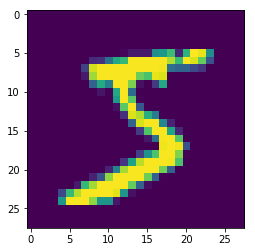

In [44]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# # calculate the mean on the training dataset
# datagen.fit(X_train)
# print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))
# # demonstrate effect on a single batch of samples
# iterator = datagen.flow(X_train, y_train, batch_size=128)
# # get a batch
# batchX, batchy = iterator.next()
# # pixel stats in the batch
# # print(batchX.shape, batchX.mean(), batchX.std())
# # # demonstrate effect on entire training dataset
# # iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)
# # # get a batch
# # batchX, batchy = iterator.next()
# # # pixel stats in the batch
# print(batchX.shape, batchX.mean(), batchX.std())

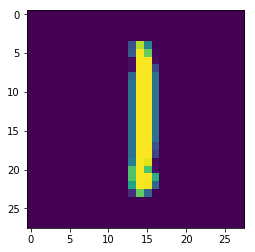

In [48]:
plt.imshow(batchX[2].reshape(28,28))

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
# Y_train[:10]


## Adding l2 regularization from every conv and Relu after BN





In [0]:
from keras.regularizers import l2

In [0]:
def ConvBnDropout(model,size,dout=0.2,K=(3,3)):
  
  model.add(Convolution2D(size, kernel_size=K,kernel_regularizer=l2(0.01) ))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(dout))
  return model  
  
  
  

In [0]:
from keras.layers import *

In [75]:

model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model=ConvBnDropout(model,16)
model=ConvBnDropout(model,24)

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model=ConvBnDropout(model,10,0,K=(1,1))

model=ConvBnDropout(model,16)
model=ConvBnDropout(model,16)
model=ConvBnDropout(model,10)
# model=ConvBnDropout(model,16)


# model=ConvBnDropout(model,10,0,K=(1,1))

model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [76]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_24 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_25 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
activation_10 (Activation)   (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 22, 22, 24)        3480      
__________

Adding checkpoints 

In [0]:
from keras.callbacks import ModelCheckpoint
filepath="Best_weights.hdf5"
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.005 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# callbacks_list = [checkpoint]

In [64]:
Y_train.shape

(60000, 10)

In [78]:
# model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[checkpoint,LearningRateScheduler(scheduler, verbose=1)])
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=128),
	validation_data=(X_test, Y_test), steps_per_epoch=len(X_train) // 128,
	epochs=20,callbacks=[checkpoint,LearningRateScheduler(scheduler, verbose=1)])


Epoch 1/20


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00001: LearningRateScheduler setting learning rate to 0.005.
468/468 [==============================] - 12s 25ms/step - loss: 0.4796 - acc: 0.9172 - val_loss: 0.2347 - val_acc: 0.9610

Epoch 00001: val_acc improved from -inf to 0.96100, saving model to Best_weights.hdf5
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0037907506.
468/468 [==============================] - 8s 17ms/step - loss: 0.1982 - acc: 0.9663 - val_loss: 0.2392 - val_acc: 0.9525

Epoch 00002: val_acc did not improve from 0.96100
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0030525031.
468/468 [==============================] - 8s 17ms/step - loss: 0.1712 - acc: 0.9707 - val_loss: 0.1698 - val_acc: 0.9706

Epoch 00003: val_acc improved from 0.96100 to 0.97060, saving model to Best_weights.hdf5
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.002554931.
468/468 [==============================] - 8s 17ms/step - loss: 0.1529 - acc: 0.

In [0]:
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

# model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])


In [82]:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=128),
	validation_data=(X_test, Y_test), steps_per_epoch=len(X_train) // 128,
	epochs=20,callbacks=[checkpoint,LearningRateScheduler(scheduler, verbose=1)])


Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
 10/468 [..............................] - ETA: 9s - loss: 0.0972 - acc: 0.9766

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


468/468 [==============================] - 8s 17ms/step - loss: 0.1408 - acc: 0.9750 - val_loss: 0.1204 - val_acc: 0.9802

Epoch 00001: val_acc did not improve from 0.99080
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
468/468 [==============================] - 8s 17ms/step - loss: 0.1168 - acc: 0.9801 - val_loss: 0.0948 - val_acc: 0.9861

Epoch 00002: val_acc did not improve from 0.99080
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
468/468 [==============================] - 8s 17ms/step - loss: 0.1048 - acc: 0.9819 - val_loss: 0.1075 - val_acc: 0.9786

Epoch 00003: val_acc did not improve from 0.99080
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
468/468 [==============================] - 8s 17ms/step - loss: 0.1008 - acc: 0.9817 - val_loss: 0.0782 - val_acc: 0.9876

Epoch 00004: val_acc did not improve from 0.99080
Epoch 5/20

Epoch 00005: LearningRateScheduler set

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [84]:
print(score)


[0.053122282722592354, 0.9896]


In [0]:
from keras.callbacks import *

In [86]:
import keras
model1=keras.models.load_model('Best_weights.hdf5')
print(model1.evaluate(X_test, Y_test, verbose=0))

[0.04756727140843868, 0.9923]


In [88]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

model.fit_generator(datagen.flow(X_train, Y_train, batch_size=128),
	validation_data=(X_test, Y_test), steps_per_epoch=len(X_train) // 128,
	epochs=20,callbacks=[checkpoint,reduce_lr])


Epoch 1/20
 10/468 [..............................] - ETA: 8s - loss: 0.0689 - acc: 0.9852

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


468/468 [==============================] - 8s 17ms/step - loss: 0.0550 - acc: 0.9877 - val_loss: 0.0461 - val_acc: 0.9911

Epoch 00001: val_acc did not improve from 0.99230
Epoch 2/20
468/468 [==============================] - 8s 17ms/step - loss: 0.0529 - acc: 0.9883 - val_loss: 0.0441 - val_acc: 0.9911

Epoch 00002: val_acc did not improve from 0.99230
Epoch 3/20
468/468 [==============================] - 8s 17ms/step - loss: 0.0544 - acc: 0.9881 - val_loss: 0.0463 - val_acc: 0.9916

Epoch 00003: val_acc did not improve from 0.99230
Epoch 4/20
468/468 [==============================] - 9s 19ms/step - loss: 0.0521 - acc: 0.9891 - val_loss: 0.0612 - val_acc: 0.9867

Epoch 00004: val_acc did not improve from 0.99230
Epoch 5/20
468/468 [==============================] - 8s 17ms/step - loss: 0.0540 - acc: 0.9880 - val_loss: 0.0478 - val_acc: 0.9904

Epoch 00005: val_acc did not improve from 0.99230
Epoch 6/20
468/468 [==============================] - 8s 17ms/step - loss: 0.0526 - acc: 0.

In [106]:
model1=keras.models.load_model('Best_weights.hdf5')
print(model1.evaluate(X_test, Y_test, verbose=0))
y_pred = model1.predict(X_test)

[0.041015708714723584, 0.9929]


###  actual_y=storing the actual test image predictions </br> Y_pred storing the predicted values </br> idxs storing the index values which are misclassified 
        

In [0]:
Y_pred=[np.argmax(i) for i in y_pred]

In [0]:
actual_y=[i for i in y_test]

In [0]:
ans=[i==j for i,j in zip(Y_pred,actual_y)]

In [0]:
idxs=[]
for i,j in enumerate(ans):
  if j==False:
    idxs.append(i)

In [112]:
(1000-len(idxs))  / 1000  #which is the accuracy ,Hence we have correct set of misclassified images

0.929

##Visualizing and plotting misclassified images

---



Predicted Image Label   : 4 

Actual Image label: 9 

Actual Image


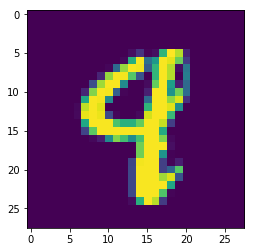

In [120]:
plt.imshow(X_test[idxs[0]].reshape(28,28)) 
print("Predicted Image Label   :",Y_pred[idxs[0]],"\n\nActual Image label:",actual_y[idxs[0]],"\n\nActual Image")

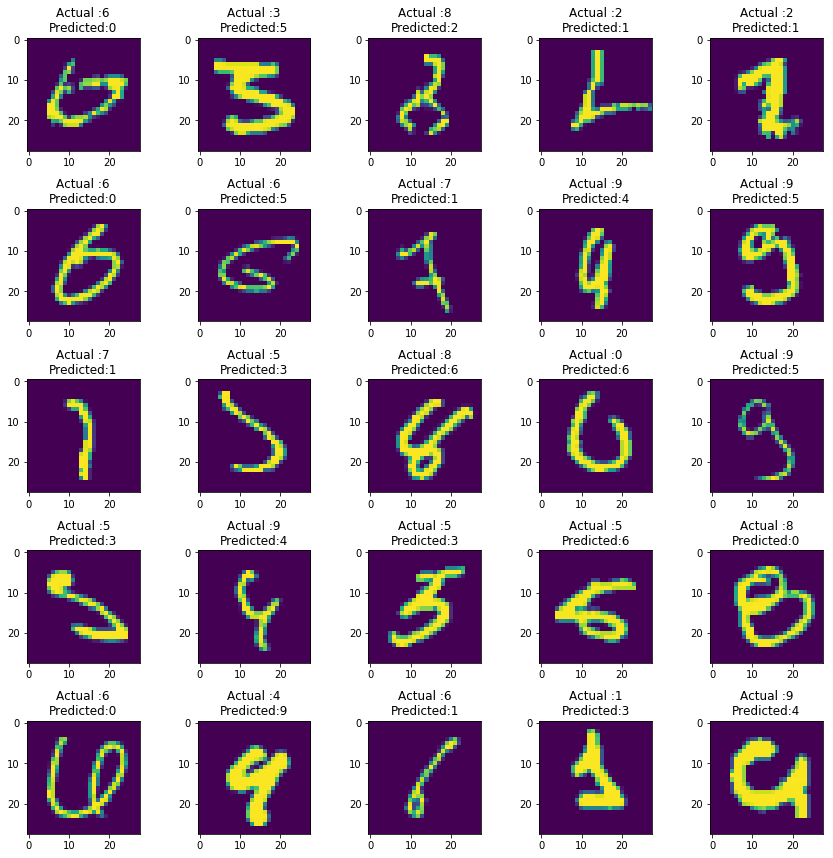

In [141]:

fig=plt.figure(figsize=(12, 12))
columns = 5
rows = 5
for i in range(1, columns*rows+1 ):
    img = X_test[idxs[i]].reshape(28,28)
    Str="Actual :"+str(actual_y[idxs[i]])+"\nPredicted:"+str(Y_pred[idxs[i]])
    fig.add_subplot(rows, columns, i,).set_title(Str)
    plt.imshow(img,)

plt.tight_layout(True)
plt.show()

In [90]:

print(y_pred[:9])
print(y_test[:9])

[[1.28103486e-10 8.13767713e-07 1.05855520e-06 1.45713159e-06
  6.24948496e-11 5.15483967e-09 7.24867768e-17 9.99996543e-01
  4.09871959e-09 8.91371954e-08]
 [9.92371724e-07 1.41378201e-04 9.99786198e-01 2.82476287e-09
  2.65297928e-07 1.12266676e-08 7.08824009e-05 1.29671079e-10
  2.15540084e-07 3.01963288e-10]
 [1.30583002e-08 9.99981999e-01 8.73189583e-06 1.24557420e-10
  3.81983091e-06 7.37717983e-07 1.48181198e-06 2.96654093e-06
  7.96029127e-08 9.96461864e-08]
 [9.99583185e-01 1.17328425e-10 4.42014834e-06 1.19671441e-07
  1.83267116e-06 9.08927177e-06 2.84149515e-04 1.54677355e-08
  4.09307950e-06 1.13118949e-04]
 [2.42948110e-11 6.38671427e-09 1.59939670e-08 2.72858125e-11
  9.99957442e-01 5.42630732e-11 1.25621922e-08 2.53963583e-09
  9.48173948e-08 4.24950995e-05]
 [2.01775308e-08 9.99979496e-01 8.02269733e-06 5.77243670e-11
  5.77076162e-06 3.10888083e-07 1.43706040e-06 4.70576060e-06
  1.40250975e-07 9.36974729e-08]
 [1.12478874e-13 9.80733312e-05 6.36912105e-08 3.62581076e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_24'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()